# Importing PyTorch and check cuda

In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import torch

print(f'{torch.cuda.is_available() = }')
print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = False
torch.cuda.device_count() = 0


In [75]:
!pip install ultralytics

In [76]:
!pip install -U ipywidgets

In [77]:
# Install kagglehub if not already installed
!pip install kagglehub

import kagglehub

# Download the dataset
path = kagglehub.dataset_download("andrewmvd/car-plate-detection")

print("Path to dataset files:", path)

# Set the dataset path
dataset_path = path  # Update this line to use the downloaded path

Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1


In [78]:
dataset_path = '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1'

## **Extracting digits from file name**

In [79]:
import re

def the_number_in_the_string(filename):
    match = re.search(r'(\d+)', filename)

    if match:
        return int(match.group(0))
    else:
        return 0

In [80]:
print(the_number_in_the_string("file123.txt"))
print(the_number_in_the_string("no_numbers"))

123
0


## **Formatting the XML File and creating DF**

In [81]:
#to store labels and image info
labels_dict = dict(
    img_path=[],
    xmin=[],
    xmax=[],
    ymin=[],
    ymax=[],
    img_w=[],
    img_h=[]
)

In [82]:
labels_dict

{'img_path': [],
 'xmin': [],
 'xmax': [],
 'ymin': [],
 'ymax': [],
 'img_w': [],
 'img_h': []}

In [83]:
import os
from glob import glob

#get XML files from the annotations dir
xml_files = glob(f'{dataset_path}/annotations/*.xml')
xml_files

['/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars380.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars302.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars132.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars359.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars268.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars343.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars42.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars400.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars98.xml',
 '/root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/annotations/Cars5.

In [84]:
import xml.etree.ElementTree as xet
import cv2

# Process each XML file, sorted by the numerical value in the filename
for filename in sorted(xml_files, key=the_number_in_the_string):

    info = xet.parse(filename)
    root = info.getroot()

 # Finding BB info
    member_object = root.find('object')
    labels_info = member_object.find('bndbox')
    xmin = int(labels_info.find('xmin').text)
    xmax = int(labels_info.find('xmax').text)
    ymin = int(labels_info.find('ymin').text)
    ymax = int(labels_info.find('ymax').text)

# join full path
    img_name = root.find('filename').text
    img_path = os.path.join(dataset_path, 'images', img_name)

# add to dictionary
    labels_dict['img_path'].append(img_path)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

# Read img and get dimensions
    height, width, _ = cv2.imread(img_path).shape
    labels_dict['img_w'].append(width)
    labels_dict['img_h'].append(height)

    alldata = pd.DataFrame(labels_dict)

In [85]:
alldata

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
0,/root/.cache/kagglehub/datasets/andrewmvd/car-...,316,364,91,126,400,225
1,/root/.cache/kagglehub/datasets/andrewmvd/car-...,222,425,98,149,500,234
2,/root/.cache/kagglehub/datasets/andrewmvd/car-...,23,56,190,198,400,225
3,/root/.cache/kagglehub/datasets/andrewmvd/car-...,228,266,228,240,400,284
4,/root/.cache/kagglehub/datasets/andrewmvd/car-...,213,271,133,168,300,225
...,...,...,...,...,...,...,...
428,/root/.cache/kagglehub/datasets/andrewmvd/car-...,293,373,205,226,600,399
429,/root/.cache/kagglehub/datasets/andrewmvd/car-...,99,162,150,167,400,215
430,/root/.cache/kagglehub/datasets/andrewmvd/car-...,99,257,225,266,375,500
431,/root/.cache/kagglehub/datasets/andrewmvd/car-...,266,307,169,188,400,267


In [86]:
from sklearn.model_selection import train_test_split

# train test val split
train, test = train_test_split(alldata, test_size=1/10, random_state=42)
train, val = train_test_split(train, train_size=8/9, random_state=42)

print(f'''
      len(train) = {len(train)}
      len(val) = {len(val)}
      len(test) = {len(test)}
''')



      len(train) = 345
      len(val) = 44
      len(test) = 44



In [87]:
import shutil

# remove if exists
if os.path.exists('datasets'):
    shutil.rmtree('datasets')

In [88]:
train

,img_path,xmin,xmax,ymin,ymax,img_w,img_h
124,/root/.cache/kagglehub/datasets/andrewmvd/car-...,143,211,171,208,400,299
315,/root/.cache/kagglehub/datasets/andrewmvd/car-...,160,246,149,171,400,233
282,/root/.cache/kagglehub/datasets/andrewmvd/car-...,139,162,172,179,400,300
236,/root/.cache/kagglehub/datasets/andrewmvd/car-...,203,285,193,229,500,375
112,/root/.cache/kagglehub/datasets/andrewmvd/car-...,129,232,260,290,400,292
...,...,...,...,...,...,...,...
110,/root/.cache/kagglehub/datasets/andrewmvd/car-...,313,371,135,150,400,190
255,/root/.cache/kagglehub/datasets/andrewmvd/car-...,116,273,156,188,400,267
292,/root/.cache/kagglehub/datasets/andrewmvd/car-...,312,406,283,311,507,388
54,/root/.cache/kagglehub/datasets/andrewmvd/car-...,96,287,116,155,400,225


## **Creating data in YOLO format**

In [89]:
def make_split_folder_in_yolo_format(split_name, split_df):
# folders in YOLO format
    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')


    os.makedirs(labels_path)
    os.makedirs(images_path)


    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))


        x_center = (row['xmin'] + row['xmax']) / 2 / row['img_w']
        y_center = (row['ymin'] + row['ymax']) / 2 / row['img_h']
        width = (row['xmax'] - row['xmin']) / row['img_w']
        height = (row['ymax'] - row['ymin']) / row['img_h']

    # save lables in YOLO format
        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")


        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))

    print(f"Created '{images_path}' and '{labels_path}'")

In [90]:
make_split_folder_in_yolo_format("train", train)
make_split_folder_in_yolo_format("val", val)
make_split_folder_in_yolo_format("test", test)

Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


In [91]:
os.getcwd()

'/content'

## **Object detection and bounding box**

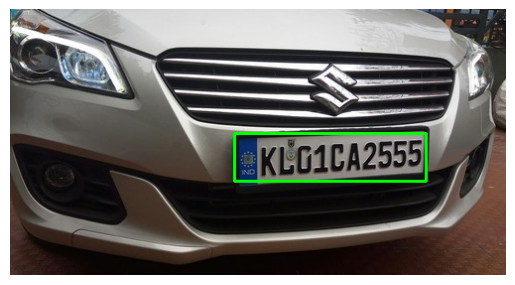

In [92]:
image_dir = 'datasets/cars_license_plate_new/train/images'
label_dir = 'datasets/cars_license_plate_new/train/labels'

image_files = sorted(os.listdir(image_dir))
first_image_file = image_files[0]

# Construct paths for image and its label
image_path = os.path.join(image_dir, first_image_file)
label_path = os.path.join(label_dir, os.path.splitext(first_image_file)[0] + '.txt')

image = cv2.imread(image_path)

# Convert img BGR to OpenCV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


with open(label_path, 'r') as f:
    lines = f.readlines()


for line in lines:

    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    img_height, img_width, _ = image.shape

# Convert YOLO format to bounding box format
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height


    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)


plt.imshow(image)
plt.axis('off')
plt.show()

In [93]:
datasets_yaml = '''
path: cars_license_plate_new

train: train/images
val: val/images
test: test/images

# number of classes
nc: 1

# class names
names: ['license_plate']
'''

# Write the content to the datasets.yaml file
with open('datasets.yaml', 'w') as file:
    file.write(datasets_yaml)

## **Using YOLOv8 nano model**

In [94]:
# using YOLOv8 nano
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

In [95]:
os.environ['WANDB_MODE'] = 'offline'

In [96]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.train(
    data='datasets.yaml',
    epochs=10,
    batch=16,
    device=device,
    imgsz=320,
    cache=True
)

Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=True, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

train: Scanning /content/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 475.25it/s]

train: New cache created: /content/datasets/cars_license_plate_new/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:12<00:00, 28.55it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 355.21it/s]

val: New cache created: /content/datasets/cars_license_plate_new/val/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:01<00:00, 39.69it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.683      2.972      1.337          8        320: 100%|██████████| 22/22 [01:18<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.06s/it]

                   all         44         44    0.00341      0.909     0.0553     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.537      1.777       1.23          9        320: 100%|██████████| 22/22 [01:13<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]

                   all         44         44    0.00404      0.932     0.0738     0.0402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.61      1.625      1.233          9        320: 100%|██████████| 22/22 [01:14<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.76s/it]

                   all         44         44      0.749     0.0679      0.455      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.533      1.522      1.257          8        320: 100%|██████████| 22/22 [01:14<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         44         44      0.707      0.659      0.675      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.538      1.422      1.262          9        320: 100%|██████████| 22/22 [01:12<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]

                   all         44         44      0.496      0.477      0.494      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.512      1.382      1.297          9        320: 100%|██████████| 22/22 [01:13<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]

                   all         44         44      0.761       0.65      0.725      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.405       1.25      1.185          9        320: 100%|██████████| 22/22 [01:15<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.65s/it]

                   all         44         44      0.799      0.659      0.753      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.419      1.219      1.244          9        320: 100%|██████████| 22/22 [01:12<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         44         44      0.812      0.882      0.902       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.388      1.144      1.168          9        320: 100%|██████████| 22/22 [01:18<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]

                   all         44         44      0.794      0.876      0.888      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.335      1.096      1.171          9        320: 100%|██████████| 22/22 [01:19<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.67s/it]

                   all         44         44      0.906      0.878      0.931      0.547



10 epochs completed in 0.221 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


                   all         44         44      0.906      0.878      0.931      0.549
Speed: 0.7ms preprocess, 55.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af73aacd240>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

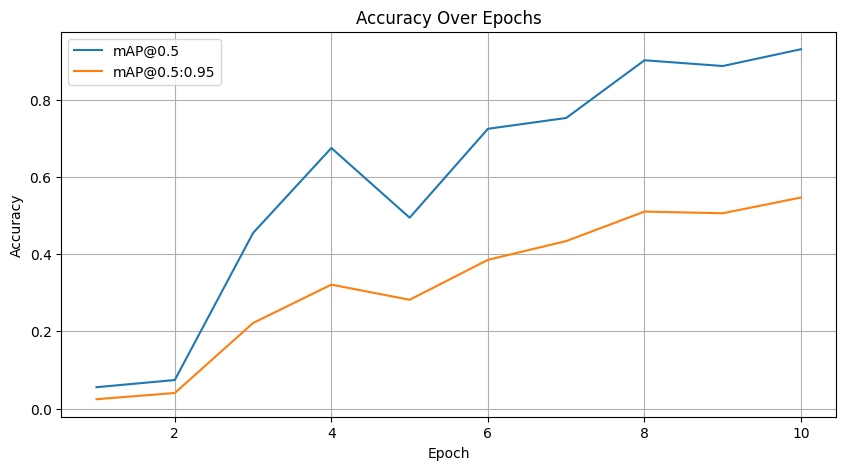

In [97]:
# Find recent training log dir
log_dir = max(glob('runs/detect/train*'), key=the_number_in_the_string)

results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results.columns = results.columns.str.strip()

epochs = results.index + 1
mAP_0_5 = results['metrics/mAP50(B)']
mAP_0_5_0_95 = results['metrics/mAP50-95(B)']

plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# save model
model.save('license_plate_model_arun.pt')

# Test and predictions

In [99]:
# to predict test image
def predict_and_plot(path_test_car):

    results = model.predict(path_test_car, device='cpu')


    image = cv2.imread(path_test_car)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    for result in results:
        for box in result.boxes:

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0]

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)


    plt.imshow(image)
    plt.axis('off')
    plt.show()


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars306.png: 320x320 1 license_plate, 329.5ms
Speed: 2.0ms preprocess, 329.5ms inference, 6.1ms postprocess per image at shape (1, 3, 320, 320)
Detected text: 


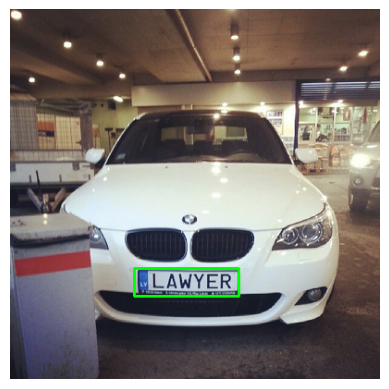

In [111]:
predict_and_plot(test.iloc[1].img_path)


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars265.png: 192x320 1 license_plate, 75.7ms
Speed: 1.3ms preprocess, 75.7ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 320)


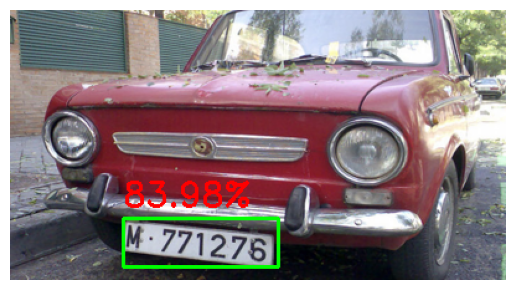

In [101]:
predict_and_plot(test.iloc[2].img_path)


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars211.png: 256x320 1 license_plate, 62.2ms
Speed: 1.5ms preprocess, 62.2ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)
Detected text: * 69022



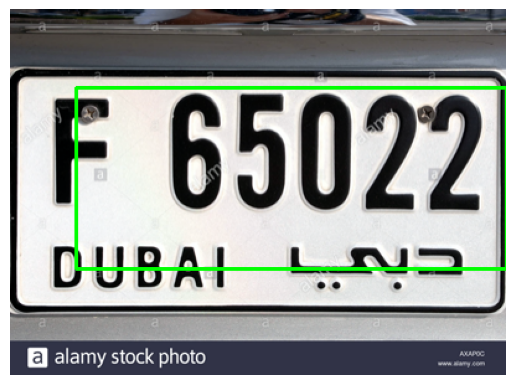

In [110]:
predict_and_plot(test.iloc[4].img_path)

## **Text Extraction OCR**

In [107]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,471 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [104]:
import pytesseract
from pytesseract import Output

In [105]:
def predict_and_plot(path_test_car):

    results = model.predict(path_test_car, device='cpu')

    image = cv2.imread(path_test_car)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    for result in results:
        for box in result.boxes:

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # crop img
            roi = image[y1:y2, x1:x2]

        # Perform OCR on the cropped image
            text = pytesseract.image_to_string(roi, config='--psm 6')
            print(f"Detected text: {text}")


    plt.imshow(image)
    plt.axis('off')
    plt.show()


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars11.png: 256x320 1 license_plate, 58.8ms
Speed: 1.4ms preprocess, 58.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)
Detected text: | WOR SIGK |



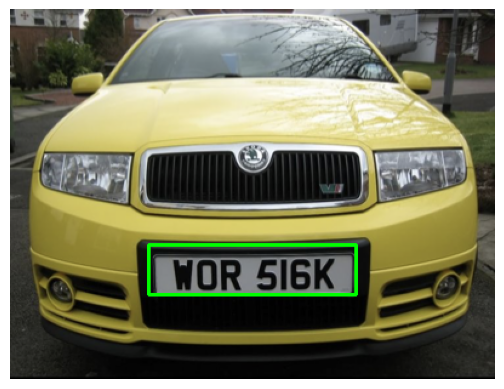

In [108]:
predict_and_plot(test.iloc[0].img_path)


image 1/1 /root/.cache/kagglehub/datasets/andrewmvd/car-plate-detection/versions/1/images/Cars243.png: 256x320 1 license_plate, 98.4ms
Speed: 1.9ms preprocess, 98.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)
Detected text: KA-03-MG - 2784



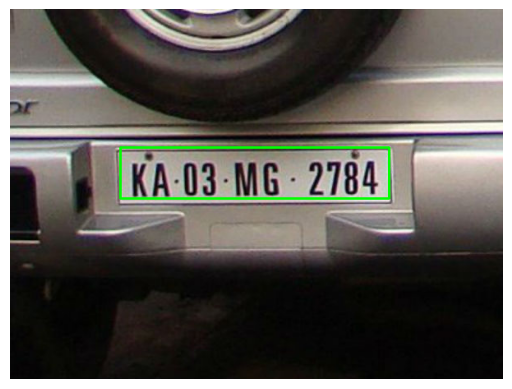

In [109]:
predict_and_plot(test.iloc[10].img_path)